# Graded: 20 of 20 correct
1. Data cleaning
- [x] Read csv
- [x] Remove correct columns
- [x] `Assessed Value` and `Sale Amount` to `int`
- [x] Display nan count
- [x] Drop nans
- [x] Make list of years from `Date Recorded` column
- [x] Add `Year Sold` column
- [x] Scatter plot of `Sale Amount` and `Year Sold`
- [x] Display outlier
- [x] Remove outlier
- [x] Create `means_df`
2. Line plot
    1. Mean Assessed Value
        - [x] Correct data
        - [x] Correct line color
        - [x] Correct marker shape
    2. Mean Sale Price
        - [x] Correct data
        - [x] Correct line color
        - [x] Correct marker shape
    - [x] Title
    - [x] Axis labels
    - [x] Legend


Comments: 

# Assignment 7: analyzing a messy dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading in the data
Set the variable `sales_df` to a Pandas DataFrame from the `Real_Estate_Sales_2001-2020_GL.csv` file and display the first 5 rows. <br /> **Note:** This is a fairly large dataset, so when you call the function to read in the file, add the argument `low_memory=False`.

In [2]:
sales_df = pd.read_csv("Real_Estate_Sales_2001-2020_GL.csv", low_memory=False)
sales_df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


## Cleaning up the data
For our analysis, we will want to do a breakdown of real estate sales by **year of sale**, **town**, **assessed value**, **sale amount**, and **property type**.

1. Removing all the unnecessary columns from `sales_df`. **Hint:** we are interested in year of *sale*, not the year the property was *listed*.
2. Change the dtypes for `Assessed Value` and `Sale Amount` to `int`.

In [3]:
sales_df.drop(columns=["List Year"], inplace=True)
sales_df["Assessed Value"] = sales_df["Assessed Value"].astype(int)
sales_df["Sale Amount"] = sales_df["Sale Amount"].astype(int)
sales_df.head()

,Serial Number,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,09/13/2021,Ansonia,230 WAKELEE AVE,150500,325000,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,10/02/2020,Ashford,390 TURNPIKE RD,253000,430000,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,03/09/2021,Avon,5 CHESTNUT DRIVE,130400,179900,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,07/02/2021,Avon,70 FAR HILLS DRIVE,862330,1447500,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


Display how many values in each column are `NaN`. This does not need to be saved as a variable. **Hint:** a function that results in a boolean can be chained with the `sum()` function to get a count.

In [4]:
# I'm not sure with the hint, is it the isna() or write our own function that results in boolean so sales_df.my_func().sum() ?
sales_df.isna().sum()

Serial Number            0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
Non Use Code        707532
Assessor Remarks    847349
OPM remarks         987279
Location            799516
dtype: int64

We need to extract the year the property was sold.
1. Remove any row with a `NaN`.
2. Set the variable `year_sold` to a list of years (as integers) extracted from the `Date Recorded` column.
3. Add a new column named `Year Sold` for those data.

In [5]:
# DROP NA
print(len(sales_df))
sales_df.dropna(subset=["Date Recorded", "Address", "Property Type", "Residential Type", "Non Use Code", "Assessor Remarks", "OPM remarks", "Location"], inplace=True)
print(len(sales_df))
# sales_df.head()

997213
264


In [6]:
# #2 YEAR_SOLD FROM YEAR OF DATE RECORDED
sales_df["Date Recorded"] = pd.to_datetime(sales_df["Date Recorded"])
sales_df["Date Recorded"] = pd.to_datetime(sales_df["Date Recorded"], )
year_sold = sales_df["Date Recorded"].dt.strftime('%Y').astype(int)
year_sold

806       2021
981       2021
1529      2020
2167      2021
2460      2021
          ... 
988393    2020
988666    2020
988904    2019
989290    2020
993143    2020
Name: Date Recorded, Length: 264, dtype: int64

In [7]:
# #3 new column Year Sold
sales_df["Year Sold"] = year_sold

In [8]:
sales_df

,Serial Number,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Year Sold
806,200594,2021-02-16,Danbury,8 HICKORY ST,121600,146216,0.831646,Residential,Single Family,25 - Other,I11192,HOUSE HAS SETTLED PER MLS,POINT (-73.44696 41.41179),2021
981,200562,2021-02-03,Danbury,19 MILL RD,263600,415000,0.635181,Residential,Single Family,25 - Other,AFFORDABLE HOUSING / B15001-20-19,INCORRECT DATA PER TOWN RECORDS,POINT (-73.53692 41.38822),2021
1529,200260,2020-11-23,Danbury,32 COALPIT HILL RD #4,84900,181778,0.467053,Residential,Condo,25 - Other,J16087-4,MULTIPLE UNIT SALE,POINT (-73.43796 41.38549),2020
2167,200148,2021-01-05,Avon,23 CHEPACHET ROAD,165260,430000,0.384326,Residential,Condo,07 - Change in Property,Includes 120&124 Pequot Road,TOTAL RENOVATION PER MLS,POINT (-72.91856 41.77954),2021
2460,200000411,2021-09-10,Brookfield,11 BRISTOL PATH,3770,180000,0.020944,Residential,Condo,25 - Other,GARAGE SOLD W/ CONDO,ALSO SEE #200000410,POINT (-73.39124 41.46698),2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988393,190349,2020-08-17,New London,91 WEST ST,73640,68000,1.082941,Single Family,Single Family,25 - Other,RATIO,NEEDS RENOVATION PER MLS - SOLD AS IS - CASH S...,POINT (-72.1084 41.36121),2020
988666,190101,2020-06-17,Westbrook,181 HAMMOCK RD N,69790,35000,1.994000,Single Family,Single Family,25 - Other,"RANCH, LOC/RR/S&S",PER MLS LOOKING FOR CASH OFFER AS HOUSE NEEDS ...,POINT (-72.46828 41.2832),2020
988904,19033,2019-10-28,Watertown,129 CAYUGA DR,68200,157000,0.434400,Single Family,Single Family,25 - Other,SALE PRICE INCLUDES LOT #12CAB ON CAYUGA DR,INCLUDES #19034,POINT (-73.13627 41.5838),2019
989290,190836,2020-06-08,Norwalk,15 CANNON ST,398690,465000,0.857398,Single Family,Single Family,25 - Other,OP CODE #22-GROSS PURCH PRICE INSUFF. TO PAY M...,SHORT SALE PER MLS,POINT (-73.40877 41.1261),2020


Let's get an overview of the `Sale Amount` data. Use the Seaborn package to create a scatter plot of `Sale Amount` as a function of `Year Sold`.

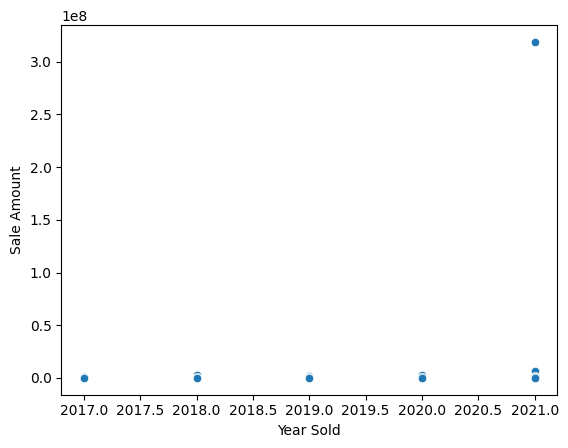

In [9]:
sns.scatterplot(data=sales_df, x="Year Sold", y="Sale Amount")
plt.show()

The data appear squashed because of an outlier. Display the outliers by returning rows from `sales_df` that have `Sale Amount` values **greater than 1e9**. You do not need to save this as a new variable

In [10]:
# THIS LINE IS NOT WORKING sales_df[sales_df["Sale Amount"] > 1e9]
# based on the scatter plot above, the scale is 1e8
sales_df[sales_df["Sale Amount"] > 1e8]

,Serial Number,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Year Sold
60894,20200078,2021-07-06,Willington,224 RIVER ROAD,223070,318790019,0.0007,Residential,Single Family,25 - Other,COLONIAL,INCORRECT SALE PRICE - NO MLS,POINT (-72.30341 41.86603),2021


Let's remove the outlier and then calculate the average property sale price by year since the housing market crash in 2008.
1. Remove the outlier from `sales_df`.
2. Set a new variable `means_df` to a DataFrame containing the mean sale and assessment values by year.
3. Using Matplotlib, create a single figure with two lineplots:
    - Grey line plot with circle markers of mean assessment value by year from 2008 to 2021
    - Steelblue line plot with square markers of mean sale price by year from 2008 to 2021
    - Title the graph "Comparison of Average Property Values and Sale Prices from 2008 to 2021"
    - Include x- and y-axis labels
    - Include a legend with labels tht correspond to the column headers

In [11]:
# REMOVE OUTLIER
new_sales_df = sales_df[sales_df["Sale Amount"] < 1e8]

In [12]:
new_sales_df

,Serial Number,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Year Sold
806,200594,2021-02-16,Danbury,8 HICKORY ST,121600,146216,0.831646,Residential,Single Family,25 - Other,I11192,HOUSE HAS SETTLED PER MLS,POINT (-73.44696 41.41179),2021
981,200562,2021-02-03,Danbury,19 MILL RD,263600,415000,0.635181,Residential,Single Family,25 - Other,AFFORDABLE HOUSING / B15001-20-19,INCORRECT DATA PER TOWN RECORDS,POINT (-73.53692 41.38822),2021
1529,200260,2020-11-23,Danbury,32 COALPIT HILL RD #4,84900,181778,0.467053,Residential,Condo,25 - Other,J16087-4,MULTIPLE UNIT SALE,POINT (-73.43796 41.38549),2020
2167,200148,2021-01-05,Avon,23 CHEPACHET ROAD,165260,430000,0.384326,Residential,Condo,07 - Change in Property,Includes 120&124 Pequot Road,TOTAL RENOVATION PER MLS,POINT (-72.91856 41.77954),2021
2460,200000411,2021-09-10,Brookfield,11 BRISTOL PATH,3770,180000,0.020944,Residential,Condo,25 - Other,GARAGE SOLD W/ CONDO,ALSO SEE #200000410,POINT (-73.39124 41.46698),2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988393,190349,2020-08-17,New London,91 WEST ST,73640,68000,1.082941,Single Family,Single Family,25 - Other,RATIO,NEEDS RENOVATION PER MLS - SOLD AS IS - CASH S...,POINT (-72.1084 41.36121),2020
988666,190101,2020-06-17,Westbrook,181 HAMMOCK RD N,69790,35000,1.994000,Single Family,Single Family,25 - Other,"RANCH, LOC/RR/S&S",PER MLS LOOKING FOR CASH OFFER AS HOUSE NEEDS ...,POINT (-72.46828 41.2832),2020
988904,19033,2019-10-28,Watertown,129 CAYUGA DR,68200,157000,0.434400,Single Family,Single Family,25 - Other,SALE PRICE INCLUDES LOT #12CAB ON CAYUGA DR,INCLUDES #19034,POINT (-73.13627 41.5838),2019
989290,190836,2020-06-08,Norwalk,15 CANNON ST,398690,465000,0.857398,Single Family,Single Family,25 - Other,OP CODE #22-GROSS PURCH PRICE INSUFF. TO PAY M...,SHORT SALE PER MLS,POINT (-73.40877 41.1261),2020


In [13]:
# MEAN DF BY YEAR SOLD
mean_df = new_sales_df.groupby("Year Sold")[["Sale Amount", "Assessed Value"]].mean().reset_index()

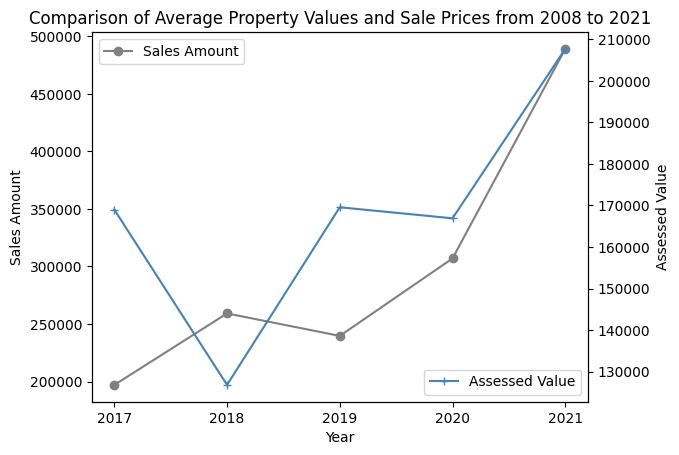

In [14]:
fig, ax1 = plt.subplots()
ax1.plot(mean_df["Year Sold"], mean_df["Sale Amount"], color="Grey", marker="o", label="Sales Amount")
ax1.set_xlabel("Year")
ax1.set_ylabel("Sales Amount")
ax1.legend(loc="upper left")

ax1.set_xticks(mean_df["Year Sold"])
ax1.set_xticklabels(mean_df["Year Sold"])

ax2 = ax1.twinx()
ax2.set_ylabel("Assessed Value")
ax2.plot(mean_df["Year Sold"], mean_df["Assessed Value"], color="Steelblue", marker="+", label="Assessed Value")
ax2.legend(loc="lower right")

# plt.legend(["Sales Amount", "Assessed Value"], loc="lower right") # NOT WORKING, I DONT KNOW WHY, ONLY SHOW ONE LEGEND

plt.title("Comparison of Average Property Values and Sale Prices from 2008 to 2021")
plt.show()